## Imports

In [44]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore') #, module = "matplotlib\..*")
%matplotlib inline

## Exploratory data exploration

In [45]:
data_path = "../dataset/regularite-mensuelle-tgv-aqst.csv" 
df_base = pd.read_csv(data_path, sep=",") #, index_col=0)
# df_base.to_csv("regularite-mensuelle-tgv-aqst.csv", index=False)
df_base.head()

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,...,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
0,2018-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,NaN,289,11.247809,...,110,6.511118,44,8,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336
1,2018-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,NaN,8,2.875000,...,22,5.696096,5,0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,NaN,37,9.501351,...,26,7.548387,17,7,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000
3,2018-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,NaN,12,19.912500,...,8,6.724757,6,4,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000
4,2018-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,NaN,61,7.796995,...,17,3.346487,6,0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000


In [46]:
df_base.sort_values(by=["retard_moyen_tous_trains_arrivee"], ascending=True)[["gare_depart", "gare_arrivee", "nb_train_depart_retard", "retard_moyen_depart", "retard_moyen_arrivee", "retard_moyen_tous_trains_arrivee"]]

,gare_depart,gare_arrivee,nb_train_depart_retard,retard_moyen_depart,retard_moyen_arrivee,retard_moyen_tous_trains_arrivee
2989,STRASBOURG,NANTES,6,1.244444,0.000000,-472.638889
3007,LYON PART DIEU,MONTPELLIER,39,14.598718,35.881111,-173.076970
3213,PARIS EST,FRANCFORT,111,7.517718,31.472222,-163.041983
2889,NIMES,PARIS LYON,190,8.765614,-40.109259,-151.291008
2886,MONTPELLIER,PARIS LYON,189,4.910406,-30.512500,-150.562114
...,...,...,...,...,...,...
787,LYON PART DIEU,RENNES,79,15.840717,58.558681,36.816870
3525,PARIS LYON,ZURICH,4,0.216667,26.469444,37.838235
3522,STUTTGART,PARIS EST,1,4.416667,61.816667,61.816667
3508,STRASBOURG,PARIS EST,3,10.522222,38.816667,83.388889


In [47]:
# retard_moyen_tous_trains_arrivee devrait être <= retard_moyen_arrivee puisque le premier concerne le retard de tous les trains (même ceux à l'heure voire en avance...)
df_base.loc[df_base.retard_moyen_tous_trains_arrivee > df_base.retard_moyen_arrivee].sort_values(by=["retard_moyen_tous_trains_arrivee"])[["gare_depart", "gare_arrivee", "nb_train_depart_retard", "retard_moyen_depart", "retard_moyen_arrivee", "retard_moyen_tous_trains_arrivee"]]

,gare_depart,gare_arrivee,nb_train_depart_retard,retard_moyen_depart,retard_moyen_arrivee,retard_moyen_tous_trains_arrivee
6407,PARIS LYON,LAUSANNE,3,46.188889,0.000000,0.059420
3589,ANNECY,PARIS LYON,0,0.000000,0.000000,0.106667
6868,TOURCOING,BORDEAUX ST JEAN,0,0.000000,0.000000,0.186022
2912,MARSEILLE ST CHARLES,MADRID,5,0.146667,0.000000,0.205556
5026,NANTES,STRASBOURG,3,2.377778,0.000000,0.216667
...,...,...,...,...,...,...
6692,MADRID,MARSEILLE ST CHARLES,0,0.000000,0.000000,21.289506
3428,ZURICH,PARIS LYON,1,16.116667,11.250000,22.825000
6838,MADRID,MARSEILLE ST CHARLES,0,0.000000,0.000000,28.008602
3525,PARIS LYON,ZURICH,4,0.216667,26.469444,37.838235


In [48]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  8154 non-null   object 
 1   service                               8154 non-null   object 
 2   gare_depart                           8154 non-null   object 
 3   gare_arrivee                          8154 non-null   object 
 4   duree_moyenne                         8154 non-null   int64  
 5   nb_train_prevu                        8154 non-null   int64  
 6   nb_annulation                         8154 non-null   int64  
 7   commentaire_annulation                0 non-null      float64
 8   nb_train_depart_retard                8154 non-null   int64  
 9   retard_moyen_depart                   8154 non-null   float64
 10  retard_moyen_tous_trains_depart       8154 non-null   float64
 11  commentaire_retar

In [49]:
df_base.describe()

,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,commentaire_retards_depart,nb_train_retard_arrivee,retard_moyen_arrivee,...,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
count,8154.000000,8154.000000,8154.000000,0.0,8154.000000,8154.000000,8154.000000,0.0,8154.000000,8154.000000,...,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000
mean,169.860314,257.198308,11.349644,NaN,88.434265,11.205745,3.076737,NaN,34.516066,33.950971,...,24.434511,32.193823,11.642016,4.245892,23.266846,21.888418,19.052124,18.995179,6.714513,7.127315
std,87.390774,173.815703,26.544553,NaN,90.384803,12.476780,5.432676,NaN,29.729349,15.702663,...,21.400761,20.195926,11.225104,4.901032,16.805192,15.692521,14.947548,14.256533,8.080759,10.249453
min,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,-229.269444,NaN,0.000000,-40.109259,...,0.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,142.000000,0.000000,NaN,22.000000,5.128410,1.140258,NaN,13.000000,24.636941,...,9.000000,12.140350,4.000000,1.000000,11.764706,11.538462,8.695652,9.523810,0.000000,0.000000
50%,164.000000,221.000000,3.000000,NaN,55.000000,9.036447,2.248271,NaN,27.000000,32.441236,...,19.000000,34.932765,9.000000,3.000000,20.967742,20.000000,16.949153,17.165179,5.000000,3.703704
75%,221.000000,333.000000,10.000000,NaN,129.000000,14.219375,3.903651,NaN,47.000000,41.346717,...,33.000000,44.268749,16.000000,6.000000,32.307692,30.000000,26.923077,26.086957,10.000000,10.000000
max,786.000000,1075.000000,297.000000,NaN,596.000000,316.188095,84.516667,NaN,376.000000,299.600000,...,312.000000,299.600000,202.000000,71.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


### Objectif 1 : Prediction du retard des trains

In [50]:
columns = df_base.columns.to_list()
num_cols = ["annee", "mois", "duree_moyenne", "nb_train_prevu", "retard_moyen_tous_trains_arrivee"]
cat_cols = ["service", "gare_depart", "gare_arrivee"]

df_delay = df_base[columns[:6] + ["retard_moyen_tous_trains_arrivee"]].copy(deep=True)
df_delay[['annee', 'mois']] = df_delay['date'].str.split('-', n=1, expand=True)
df_delay.drop(['date'], axis=1, inplace=True)
df_delay.drop_duplicates(inplace=True)
df_delay.annee = pd.to_numeric(df_delay.annee)
df_delay.mois = pd.to_numeric(df_delay.mois)

df_delay.describe(include="all")

,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,retard_moyen_tous_trains_arrivee,annee,mois
count,8154,8154,8154,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000
unique,2,59,59,NaN,NaN,NaN,NaN,NaN
top,National,PARIS LYON,PARIS LYON,NaN,NaN,NaN,NaN,NaN
freq,7142,1649,1649,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,169.860314,257.198308,5.668612,2020.240986,6.236326
std,NaN,NaN,NaN,87.390774,173.815703,7.971691,1.608478,3.441466
min,NaN,NaN,NaN,0.000000,0.000000,-472.638889,2018.000000,1.000000
25%,NaN,NaN,NaN,100.000000,142.000000,3.129384,2019.000000,3.000000
50%,NaN,NaN,NaN,164.000000,221.000000,4.962422,2020.000000,6.000000
75%,NaN,NaN,NaN,221.000000,333.000000,7.673542,2022.000000,9.000000


#### Prepare data for consumption

In [51]:
# OUTLIERS

# valeur min de -472.638889 pour retard_moyen_tous_trains_arrivee...
# sns.histplot(df_delay_train['retard_moyen_tous_trains_arrivee'])
# df_delay_train.sort_values(by=["retard_moyen_tous_trains_arrivee"], ascending=True)

# Méthode de Tuckey pour les outliers

def smooth_outliers(val, outlier_step, Q1, Q3):
    if val < Q1-outlier_step:
        val = Q1-outlier_step
    elif val > Q3+outlier_step:
        val = Q3+outlier_step
    return val

def clean_outliers(df):
    # df = input_df.copy(deep=True)
    for col_name in outlier_cols:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col_name], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col_name],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        df[col_name] = df[col_name].apply(lambda x: smooth_outliers(x, outlier_step, Q1, Q3))
    return df

# df_delay_train.describe(include="all")

In [52]:
# VALEURS MANQUANTES
print(f"Train df : {df_delay_train.isna().sum().sum() == 0}") # no missing values
print(f"Test df : {df_delay_test.isna().sum().sum() == 0}") # no missing values

Train df : True
Test df : True


In [53]:
# CREATE = FEATURE ENGINEERING

# Simple binary ohe for the "service" feature
# for df in [df_delay_train, df_delay_test]:
#     df.service = df.service.apply(lambda x: 0 if x == "National" else 1)

In [54]:
# For the "gare_depart" and "gare_arrivee" features:
# Applying simple OHE will give way to many sparse features (more than 100...)
# https://annahava.medium.com/too-many-categories-how-to-deal-with-categorical-features-of-high-cardinality-d4563cfe62d6

# We need to find a way to group these features : clusters !
# - groupe train stations by magnitude of the associated city ?
# - by vague geographic location ?
# - merge both features into one and then applying some clustering ?
# - ...

##### Add geo features and create maps

In [13]:
# Add geo features
# https://medium.com/@amorrison_58444/geocoding-with-the-openstreetmap-api-and-geopy-325633980a15
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="adrico")

def get_coordinates(station_names):
    station_coords = {}
    for station_name in station_names:
        # city_name = station_name.split(" ")[0]
        if station_name in station_coords.keys():
            break
        location_variable = geolocator.geocode(f"{station_name}, France", limit=1, exactly_one=False)
        # print(location_variable)
        for info in location_variable:
            # print(info.raw)
            # if info.raw["addresstype"] == "city": # maybe not necessary...
            lat = info.raw["lat"]
            lon = info.raw["lon"]
            station_coords[station_name] = (lat, lon)
            # print(station_name, lat, lon)
                # break
    return station_coords

station_names = sorted(list(set(list(df_delay_train.gare_depart.unique()) + list(df_delay_train.gare_arrivee.unique()))))
station_coords = get_coordinates(station_names)

for station_type in ["depart", "arrivee"]:
    df_delay_train[f"geo_infos_{station_type}"] = df_delay_train[f"gare_{station_type}"].apply(lambda x:station_coords[x])


In [19]:
# https://medium.com/datasciencearth/map-visualization-with-folium-d1403771717

import folium

colors = ["green", "yellow", "orange", "red", "black"]
max_delay = max(df_delay_train.retard_moyen_tous_trains_arrivee)
for station_type in ["depart", "arrivee"]:
    sncf_map = folium.Map(location=[47,2], zoom_start=5, tiles="cartodb positron")
    df_delay_train_map = pd.DataFrame(df_delay_train.groupby([f"gare_{station_type}", "geo_infos_depart", "geo_infos_arrivee"])["retard_moyen_tous_trains_arrivee"].mean()).reset_index(level=[0,1,2]).copy(deep=True)

    for idx, row in df_delay_train_map.iterrows():
        line_coords = []
        geo_col_name = f"geo_infos_{station_type}"
        station_col_name = f"gare_{station_type}"
        lat, lon = row[geo_col_name]
        line_coords.append((lat, lon))
        station = row[station_col_name]
        color = colors[max(0,int(len(colors)*row["retard_moyen_tous_trains_arrivee"]/max_delay)-1)]
        folium.Marker(location=[lat,lon], popup = station, icon=folium.Icon(color=color)).add_to(sncf_map)
        # FOR SOME REASON, POLYLINE CRASHES THE KERNEL...
        # folium.PolyLine(line_coords,
        #                 color=colors[int(len(colors)*row["retard_moyen_tous_trains_arrivee"]/max_delay)],
        #                 weight=15,
        #                 opacity=0.8).add_to(train_map)
    sncf_map.save(f"train_map_{station_type}.html")

##### Continue EDA

In [55]:
# Add 2 features with info of mean delay per station (as a start station and end station) on the whole dataset : 
# this is a kind of way to encode "time" and info from the past to help with the current predictions
# but this is too vague and we should maybe just add the value of the previous month...

# retards_moy_gare_depart_df = df_delay_train.groupby("gare_depart", as_index=False)["retard_moyen_tous_trains_arrivee"].mean().rename(columns = {'retard_moyen_tous_trains_arrivee':'retard_moyen_tous_trains_gare_depart'})
# retards_moy_gare_arrivee_df = df_delay_train.groupby("gare_arrivee", as_index=False)["retard_moyen_tous_trains_arrivee"].mean().rename(columns = {'retard_moyen_tous_trains_arrivee':'retard_moyen_tous_trains_gare_arrivee'})

# result_df = pd.merge(pd.merge(df_delay_train, retards_moy_gare_depart_df, on="gare_depart"), retards_moy_gare_arrivee_df, on="gare_arrivee")
# result_df


# Add the average delay for the train line
# On ne prend que en compte les trajets passés !!!

def add_past_avg_delay(df):

    df["retards_moy_arrivee_trajet_passés"] = 0.0

    for i, row in df.iterrows():
        gare_depart, gare_arrivee = row["gare_depart"], row["gare_arrivee"]
        if i>1:
            mean_delay_series = df[:i-1].loc[(df.gare_depart == gare_depart) & (df.gare_arrivee == gare_arrivee),"retard_moyen_tous_trains_arrivee"]
            # print(mean_delay)
            if mean_delay_series.empty:
                # on prend la même valeur pour la première occurence de chaque trajet
                df.loc[i, "retards_moy_arrivee_trajet_passés"] = row["retard_moyen_tous_trains_arrivee"]
            else:
                mean_delay =  mean_delay_series.mean()
                df.loc[i, "retards_moy_arrivee_trajet_passés"] = mean_delay
        else:
            # on prend la même valeur pour la première occurence de chaque trajet (qui est aussi la première ligne du df dans ce cas)
            df.loc[i, "retards_moy_arrivee_trajet_passés"] = row["retard_moyen_tous_trains_arrivee"]

    return df

# retards_moy_arrivee_trajet_all_df = df_delay_train.groupby(["gare_depart", "gare_arrivee"], as_index=False)["retard_moyen_tous_trains_arrivee"].mean().rename(columns = {'retard_moyen_tous_trains_arrivee':'retards_moy_arrivee_trajet_all'})
# df_delay_train = pd.merge(df_delay_train, retards_moy_arrivee_trajet_all_df, on=["gare_depart", "gare_arrivee"])
# df_delay_train

In [56]:
# On ajoute les retards moyens sur le mois précédent et sur l'année précédente

# df_delay_train["retards_moy_arrivee_trajet_mois_prec"] = 0.0
# df_delay_train["retards_moy_arrivee_trajet_annee_prec"] = 0.0

# for i,row in df_delay_train.iterrows():
#     annee, mois = row["annee"], row["mois"]
#     gare_depart, gare_arrivee = row["gare_depart"], row["gare_arrivee"]
#     date_mois_prec = (annee, mois-1) if mois>=2 else ((annee-1, 12) if annee>=2019 else (annee, mois))
#     date_annee_prec = (annee-1, mois) if annee >=2019 else (annee, mois)

#     for date_prec, col_name in [(date_mois_prec, "retards_moy_arrivee_trajet_mois_prec"), (date_annee_prec, "retards_moy_arrivee_trajet_annee_prec")]:
#         series = df_delay_train.loc[(df_delay_train.gare_depart == gare_depart) & (df_delay_train.gare_arrivee == gare_arrivee) & (df_delay_train.annee == date_prec[0]) & (df_delay_train.mois == date_prec[1]), "retard_moyen_tous_trains_arrivee"]
#         if not series.empty:
#             value = series.values[0]
#             df_delay_train.loc[i, col_name] = value
#         else:
#             # un peu brutal de prendre la moyenne totale direct : on pourrait essayer le mois d'avant encore ou l'année d'avant
#             df_delay_train.loc[i, col_name] = row["retards_moy_arrivee_trajet_all"]
# df_delay_train

In [57]:
# On ajoute les retards de chacun des trois mois précédents (doit-on enlever les 3 premiers mois du dataset du coup ?)


def add_delays_previous_months(df, n_months):
    past_month_cols = [f"retards_moys_mois_n-{i}" for i in range(1, n_months+1)]
    for col in past_month_cols:
        df[col] = 0.0
    for i,row in df.iterrows():
        if i%500 == 0:
            print(i)
        annee, mois = row["annee"], row["mois"]
        gare_depart, gare_arrivee = row["gare_depart"], row["gare_arrivee"]
        for j, col_name in enumerate(past_month_cols):
            n_mois_a_soustraire = j+1
            date_mois_prec = (annee, mois-n_mois_a_soustraire) if mois>=n_mois_a_soustraire+1 else ((annee-1, 12+mois-n_mois_a_soustraire) if annee>=2019 else (annee, mois))
            # print((annee, mois), n_mois_a_soustraire, date_mois_prec)
            series = df.loc[(df.gare_depart == gare_depart) & (df.gare_arrivee == gare_arrivee) & (df.annee == date_mois_prec[0]) & (df.mois == date_mois_prec[1]), "retard_moyen_tous_trains_arrivee"]
            # print(series)
            if not series.empty:
                value = series.values[0]
                # print(value)
                df.loc[i, col_name] = value
            else:
                # un peu brutal de prendre la moyenne totale direct : on pourrait essayer le mois d'avant encore ou l'année d'avant...
                df.loc[i, col_name] = row["retards_moy_arrivee_trajet_passés"]
    return df

In [58]:
# Ajout des pays
# df_delay_train[["gare_depart", "gare_arrivee"]].value_counts().to_csv("test.csv")
gare_to_pays = {"GENEVE":"Suisse", "ZURICH":"Suisse", "ITALIE":"Italie", "LAUSANNE":"Suisse", "BARCELONA":"Espagne", "MADRID":"Espagne", "STUTTGART":"Allemagne", "FRANCFORT":"Allemagne"}

def add_countries(df, gare_to_pays):
    df["pays"] = df.apply(lambda row: gare_to_pays.get(row["gare_depart"], gare_to_pays.get(row["gare_arrivee"], "France")), axis=1)
    return df

# def add_summer(df):
#     df["summer"] = df["mois"].apply(lambda x: x in [6, 7, 8])
#     return df

In [59]:
# min_delay = min(df_delay_train.retard_moyen_tous_trains_arrivee)
# max_delay = max(df_delay_train.retard_moyen_tous_trains_arrivee)

# nb_bins = 5
# bins = [min_delay + i*(max_delay-min_delay)/(nb_bins-1) for i in range(nb_bins)]
# labels = [str(i) for i in range(nb_bins-1)]
# print(bins, labels)
# df_delay_train['grade'] = pd.cut(x = df_delay_train['retard_moyen_tous_trains_arrivee'], bins = bins, labels = labels, include_lowest = True)
# df_delay_train

In [60]:
# # Ajout des lignes TGV
# gares_data_path = "../dataset/liste-des-gares.csv" 
# df_gares = pd.read_csv(gares_data_path, sep=";") #, index_col=0)
# # df_base.to_csv("regularite-mensuelle-tgv-aqst.csv", index=False)
# df_gares.head()

In [61]:
# CONVERT

def convert_dataframes(df, drop_cols, dummy_cols, numeric_scale_cols, scaler, train=True):
    df = df.drop(drop_cols, axis=1, inplace=False)
    df = pd.get_dummies(df, prefix=["mois", "pays"], columns=dummy_cols, drop_first=True)
    if train:
        df[numeric_scale_cols] = scaler.fit_transform(df[numeric_scale_cols])
    else:
        df[numeric_scale_cols] = scaler.transform(df[numeric_scale_cols])
    return df, scaler

In [62]:
# Full Data Preprocessing pipeline

# TRAIN-TEST SPLIT
def train_test_split(df):
    return df.loc[df.annee < 2023], df.loc[df.annee == 2023]
df_delay_train, df_delay_test = train_test_split(df_delay)

# OUTLIERS
print("Dealing with outliers")
outlier_cols = ["duree_moyenne", "nb_train_prevu", "retard_moyen_tous_trains_arrivee"]
print("   Train")
df_delay_train = clean_outliers(df_delay_train)
print("   Test")
df_delay_test = clean_outliers(df_delay_test)

# FEATURE ENGIENEERING
print("Feature engineering")
full_delay_df = pd.concat([df_delay_train, df_delay_test])
print("   Add summer bool")
full_delay_df = add_summer(full_delay_df)
print("   Adding average delays of all previous months")
full_delay_df = add_past_avg_delay(full_delay_df)
n_months = 3
print(f"   Adding delays of {n_months} previous months")
full_delay_df = add_delays_previous_months(full_delay_df, n_months)
print("   Adding country info")
gare_to_pays = {"GENEVE":"Suisse", "ZURICH":"Suisse", "ITALIE":"Italie", "LAUSANNE":"Suisse", "BARCELONA":"Espagne", "MADRID":"Espagne", "STUTTGART":"Allemagne", "FRANCFORT":"Allemagne"}
full_delay_df = add_countries(full_delay_df, gare_to_pays)

# CONVERT
print("Dataframe conversions")
drop_cols = ["service", "gare_depart", "gare_arrivee", "annee"]
dummy_cols = ["mois", "pays"]
target_col = ["retard_moyen_tous_trains_arrivee"]
numeric_scale_cols = [col for col in df_delay_train.columns if col not in drop_cols + dummy_cols + target_col]

df_delay_train_clean, df_delay_test_clean = train_test_split(full_delay_df)

Dealing with outliers
   Train
   Test
Feature engineering
   Add summer bool
   Adding average delays of all previous months
   Adding delays of 3 previous months
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
   Adding country info
Dataframe conversions


In [63]:
scaler = MinMaxScaler()
print("   Train")
df_delay_train_clean, fitted_scaler = convert_dataframes(df_delay_train_clean, drop_cols, dummy_cols, numeric_scale_cols, scaler, train=True)
print("   Test")
df_delay_test_clean, fitted_scaler = convert_dataframes(df_delay_test_clean, drop_cols, dummy_cols, numeric_scale_cols, fitted_scaler, train=False)
df_delay_test_clean = df_delay_test_clean.reindex(columns = df_delay_train_clean.columns, fill_value=0) # add zeros for the ohe months of the train set

# X and y splits
print("Splitting into X and y")
df_delay_train_clean_X, df_delay_train_clean_y = df_delay_train_clean.drop(target_col, axis=1, inplace=False), pd.DataFrame(df_delay_train_clean[target_col[0]])
df_delay_test_clean_X, df_delay_test_clean_y = df_delay_test_clean.drop(target_col, axis=1, inplace=False), pd.DataFrame(df_delay_test_clean[target_col[0]])

   Train
   Test
Splitting into X and y


In [64]:
df_delay_train_clean_X

,duree_moyenne,nb_train_prevu,summer,retards_moy_arrivee_trajet_passés,retards_moys_mois_n-1,retards_moys_mois_n-2,retards_moys_mois_n-3,mois_2,mois_3,mois_4,...,mois_7,mois_8,mois_9,mois_10,mois_11,mois_12,pays_Espagne,pays_France,pays_Italie,pays_Suisse
0,0.349010,1.000000,False,6.511118,6.511118,6.511118,6.511118,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0.408416,0.363636,False,5.696096,5.696096,5.696096,5.696096,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.544554,0.406224,False,7.578947,7.578947,7.578947,7.578947,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0.386139,0.167076,False,6.790686,6.790686,6.790686,6.790686,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0.150990,0.640459,False,3.346487,3.346487,3.346487,3.346487,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7423,0.767327,0.306306,False,8.068062,8.645183,10.405750,14.230961,False,False,False,...,False,False,False,False,False,True,False,True,False,False
7424,0.252475,1.000000,False,5.174632,5.260839,7.041023,4.466253,False,False,False,...,False,False,False,False,False,True,False,True,False,False
7425,0.804455,0.101556,False,6.268796,4.996000,10.131515,1.483333,False,False,False,...,False,False,False,False,False,True,False,True,False,False
7426,0.284653,0.959869,False,4.906650,7.107130,6.080269,5.552318,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [65]:
df_delay_train_clean_X.columns

Index(['duree_moyenne', 'nb_train_prevu', 'summer',
       'retards_moy_arrivee_trajet_passés', 'retards_moys_mois_n-1',
       'retards_moys_mois_n-2', 'retards_moys_mois_n-3', 'mois_2', 'mois_3',
       'mois_4', 'mois_5', 'mois_6', 'mois_7', 'mois_8', 'mois_9', 'mois_10',
       'mois_11', 'mois_12', 'pays_Espagne', 'pays_France', 'pays_Italie',
       'pays_Suisse'],
      dtype='object')

In [66]:
df_delay_test_clean_X.columns

Index(['duree_moyenne', 'nb_train_prevu', 'summer',
       'retards_moy_arrivee_trajet_passés', 'retards_moys_mois_n-1',
       'retards_moys_mois_n-2', 'retards_moys_mois_n-3', 'mois_2', 'mois_3',
       'mois_4', 'mois_5', 'mois_6', 'mois_7', 'mois_8', 'mois_9', 'mois_10',
       'mois_11', 'mois_12', 'pays_Espagne', 'pays_France', 'pays_Italie',
       'pays_Suisse'],
      dtype='object')

#### EDA with stats

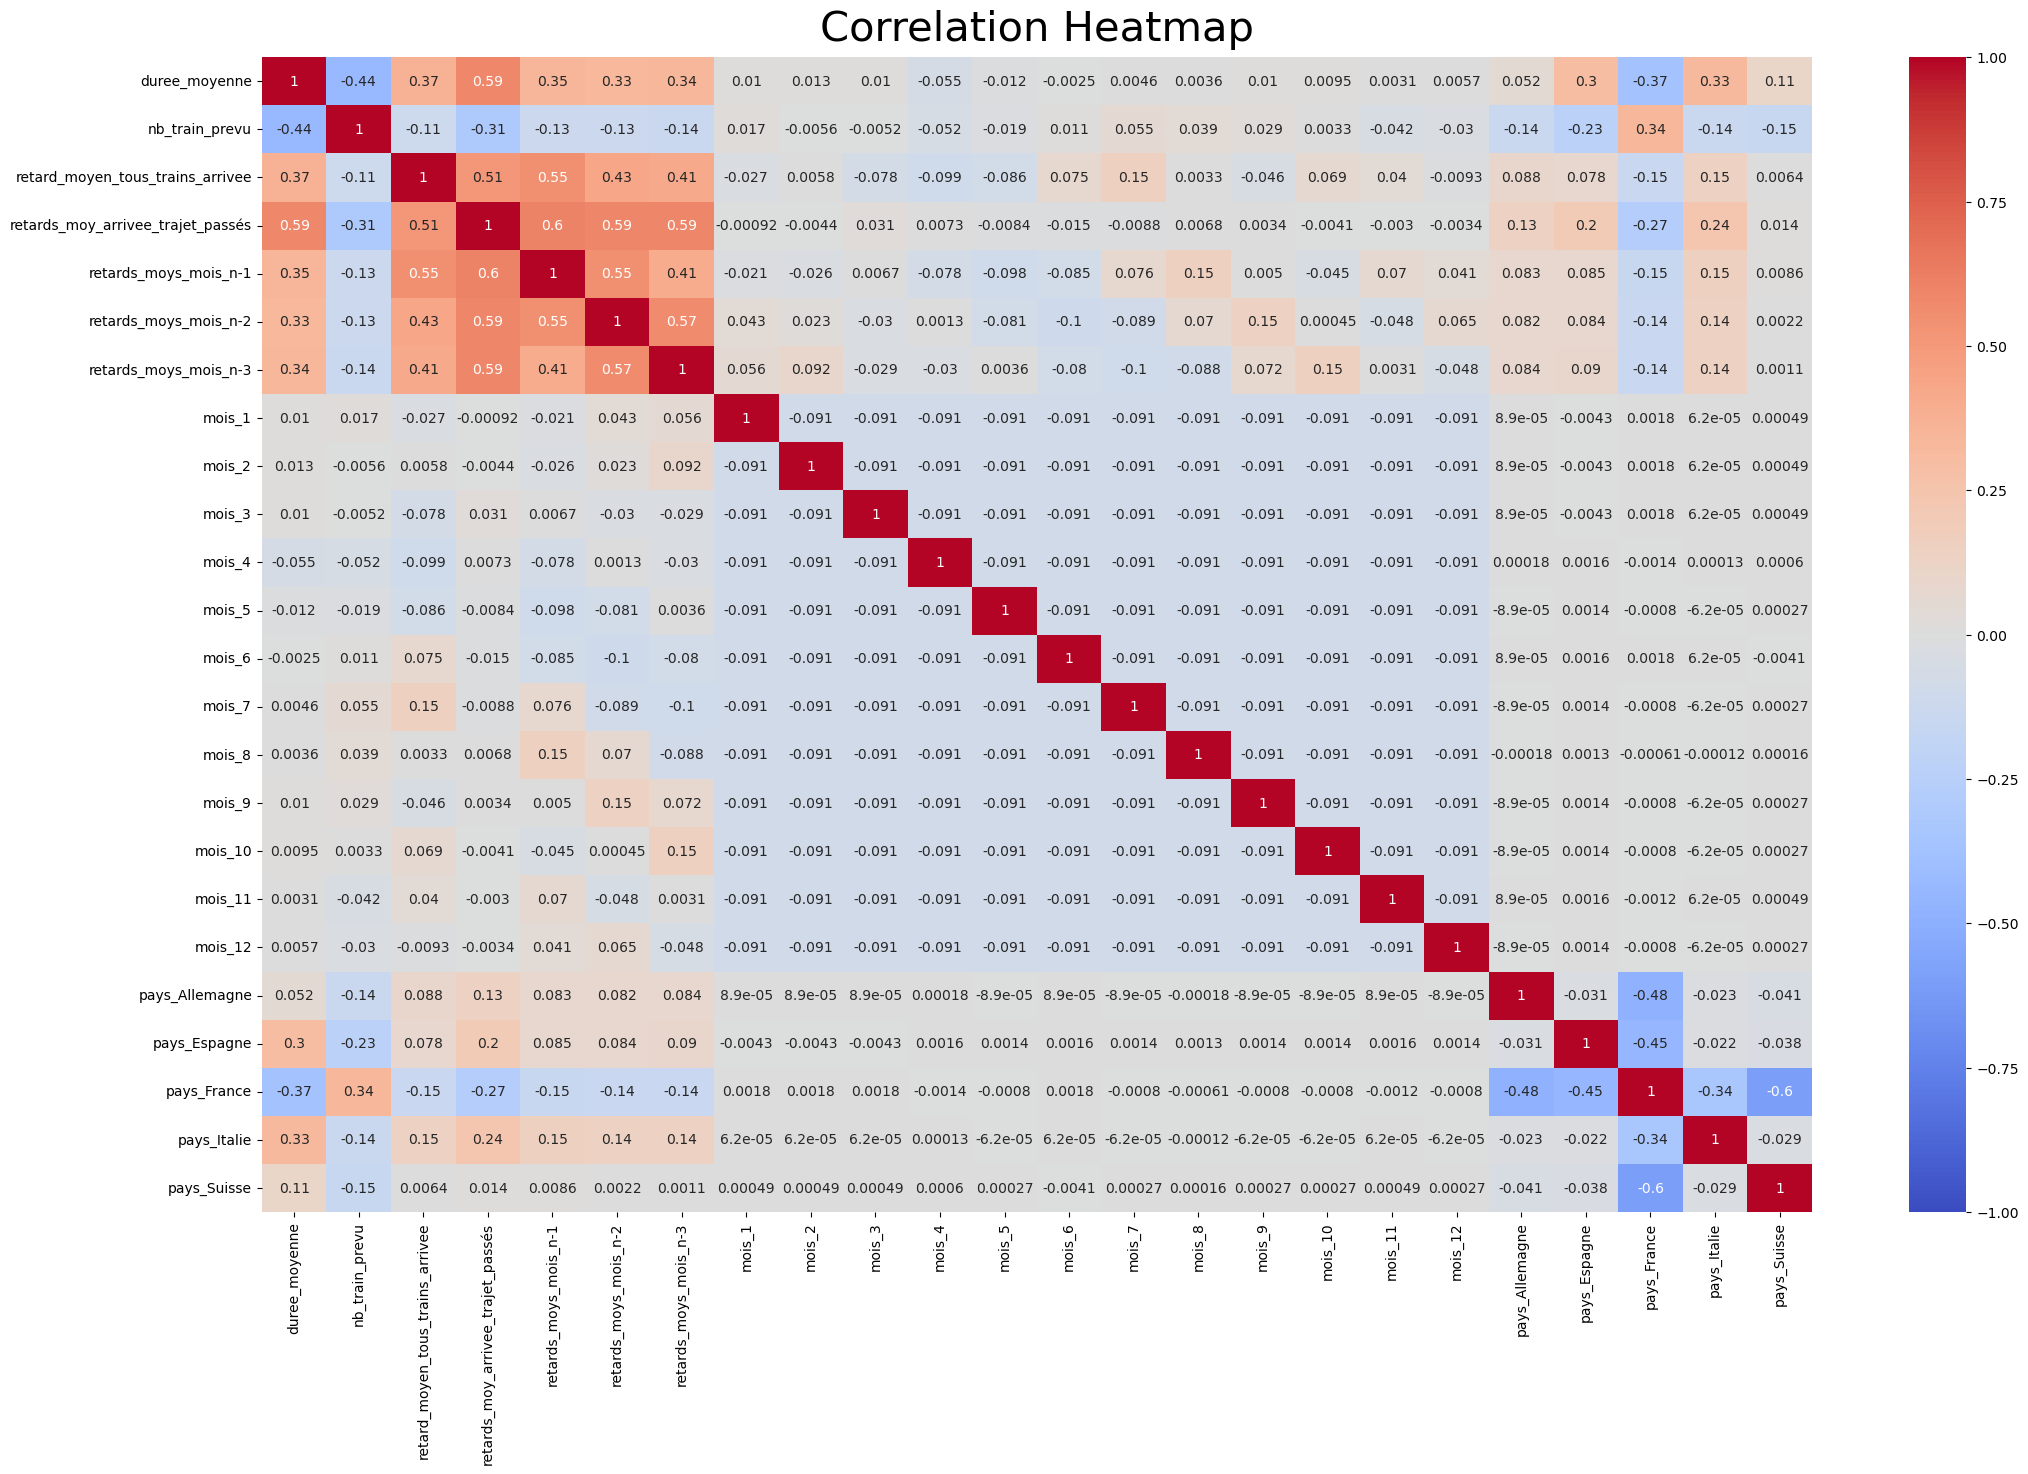

In [152]:
# Add heatmaps of the dataframe's correlation matrix
# https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

plt.figure(figsize=(25, 15))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':30}, pad=12)
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('full_heatmap.png', dpi=300, bbox_inches='tight')

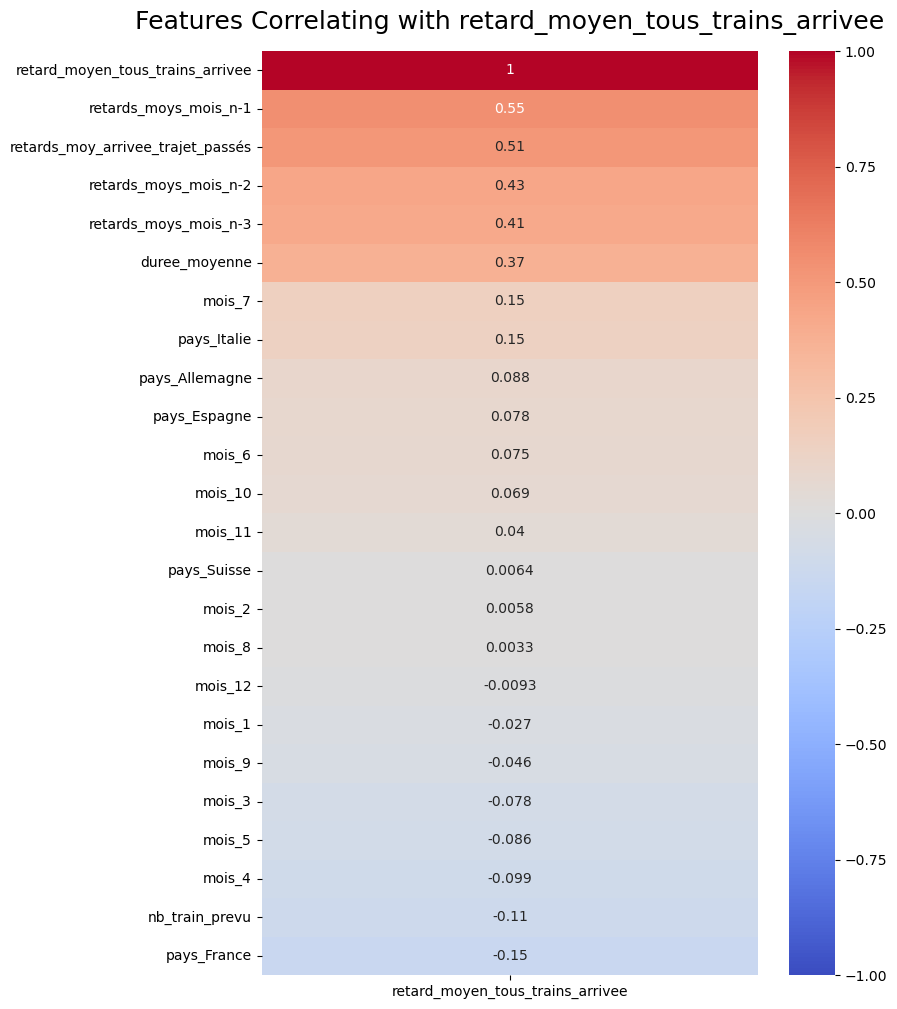

In [153]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[target_col].sort_values(by=target_col[0], ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title(f'Features Correlating with {target_col[0]}', fontdict={'fontsize':18}, pad=16)
plt.savefig('target_heatmap.png', dpi=300, bbox_inches='tight')

Quick description :
- Very high influence of the delays in the past months and the average past delays for each TGV line !
- Not much influence of months except for July (only keep this one ?)
- This seems promising since we only use past (known) values to construct our features => easily replicable to the test set !
- Apart from France and Italy, country info does not seem to add much...

Ideas : 
- Maybe try with even more past months (currently we only look at the last 3) : should we only start training after start_date + n_past_months or can we still use this portion of the data ? Look for some tradeoff !
- Maybe we could try to add more geographical insights to the data regarding the TGV path ? Like maybe the line (I tried with the new csv but not very useful since lines are too short...) or even the region for French cities (based on geo coordinates computed above) ? Or maybe the data from the previous months is enough ?

Next steps : 
- A bit more EDA (see Notion page)
- Start applying regression models to our dataset  (based on previous experience, I am pretty sure ensemble methods like Random Forest will perform particularely well on this kind of data !)


#### Modeling

In [67]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [68]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [86]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, scoring = "neg_root_mean_squared_error" , param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(df_delay_train_clean_X, df_delay_train_clean_y)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [87]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [90]:
from sklearn.metrics import mean_squared_error

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features).reshape(len(test_labels), 1)
    # print(predictions)
    # print(test_labels)
    rmse = mean_squared_error(test_labels, predictions, squared=False)
    # errors = abs(predictions - test_labels)
    # mape = 100 * np.mean(errors / test_labels)
    print('Model Performance')
    print('Root Mean Square Error: {:0.4f}.'.format(rmse))
    # print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return rmse

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(df_delay_train_clean_X, df_delay_train_clean_y)
base_rmse = evaluate(base_model, df_delay_test_clean_X, df_delay_test_clean_y)

best_random = rf_random.best_estimator_
random_rmse = evaluate(best_random, df_delay_test_clean_X, df_delay_test_clean_y)

print('Improvement of {:0.2f}%.'.format( 100 * (base_rmse - random_rmse) / base_rmse))

Model Performance
Root Mean Square Error: 2.7881.
Model Performance
Root Mean Square Error: 2.7324.
Improvement of 2.00%.


In [84]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [85]:
# Fit the grid search to the data
grid_search.fit(df_delay_train_clean_X, df_delay_train_clean_y)
print(grid_search.best_params_)

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, df_delay_test_clean_X, df_delay_test_clean_y)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Fitting 3 folds for each of 288 candidates, totalling 864 fits
{'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 200}
Model Performance
Average Error: 45.2860.
Accuracy = 54.71%.
Improvement of -7.26%.
